# Proyek Analisis Data: Bike Sharing Dataset
- Email: anas.f.hanif@students.amikom.ac.id
- Id Dicoding: anashaneef

## **Pertanyaan Bisnis**
* Bagaimana tipe pengguna Bike Sharing setiap harinya?
* Bagaimana produktifitas Bike Sharing dalam 24 jam?
* Bagaimana produktifitas Bike Sharing pada setiap bulan?
* Bagaimana pengaruh cuaca dan musim terhadap produktifitas Bike Sharing?

## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## **Data Wrangling**

### **Gathering Data**

In [2]:
day = pd.read_csv('./data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour = pd.read_csv('./data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

**Dataset Information**
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
  * Clear, Few clouds, Partly cloudy, Partly cloudy
  * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

#### **Day Dataframe**

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print('Jumlah duplikasi: ',day.duplicated().sum())
day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### **Hour Dataframe**

In [6]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print('Jumlah duplikasi: ',hour.duplicated().sum())
hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### **Cleaning Data**

#### **Day Dataframe**

Menghapus kolom holiday karena informasi pada kolom tersebut sudah terwakilkan pada kolom workingday

In [8]:
day.drop(['holiday'], axis=1, inplace=True)

Mengubah beberapa nama header kolom agar lebih mudah dipahami dan menghindari kesalahan penulisan

In [9]:
day.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

Mengubah tipe data kolom date yang semula object menjadi datetime

In [10]:
datetime_columns = ['date']

for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

In [11]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    int64         
 3   year              731 non-null    int64         
 4   month             731 non-null    int64         
 5   day               731 non-null    int64         
 6   workingday        731 non-null    int64         
 7   weather           731 non-null    int64         
 8   temperature       731 non-null    float64       
 9   temperature_feel  731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual_user       731 non-null    int64         
 13  registered_user   731 non-null    int64         
 14  total_user        731 non-

Mengubah season dari yang semula numerik menjadi value yang sebenarnya. Angka-angka pada season mewakili:
* 1 adalah springer
* 2 adalah summer
* 3 adalah fall
* 4 adalah winter

In [12]:
def change_season(x):
    if x == 1:
        return 'springer'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

day['season'] = day['season'].apply(change_season)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah year dengan ketentuan berikut:
* 0 berarti tahun 2011
* 1 berarti tahun 2012

In [13]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

day['year'] = day['year'].apply(change_year)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data month sesuai urutan bulan

In [14]:
month_change = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

day['month'] = day['month'].map(month_change)
day.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data weekday menjadi nama-nama hari

In [15]:
day_change = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

day['day'] = day['day'].map(day_change)
day.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data pada workingday yang semula numerik untuk memperjelas makna dari data tersebut

In [16]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

day['workingday'] = day['workingday'].apply(change_workingday)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,weekend/holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,weekend/holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,working day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,working day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,working day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data weather agar lebih merepresentasikan data sesungguhnya dengan ketentuan
* 1 adalah clear
* 2 adalah mist
* 3 adalah light snow
* 4 adalah heavy rain

In [17]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

day['weather'] = day['weather'].apply(change_weather)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,weekend/holiday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,weekend/holiday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,working day,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,working day,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,working day,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **Hour Dataframe**

Menghapus kolom holiday karena informasi pada kolom tersebut sudah terwakilkan pada kolom workingday

In [18]:
hour.drop(['holiday'], axis=1, inplace=True)

Mengubah beberapa nama header kolom agar lebih mudah dipahami dan menghindari kesalahan penulisan

In [19]:
hour.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weekday':'day',
                     'weathersit':'weather', 'temp':'temperature', 'atemp':'temperature_feel',
                     'hum':'humidity', 'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

Mengubah tipe data kolom date yang semula object menjadi datetime

In [20]:
datetime_columns = ['date']

for column in datetime_columns:
  hour[column] = pd.to_datetime(hour[column])

In [21]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  int64         
 3   year              17379 non-null  int64         
 4   month             17379 non-null  int64         
 5   hour              17379 non-null  int64         
 6   day               17379 non-null  int64         
 7   workingday        17379 non-null  int64         
 8   weather           17379 non-null  int64         
 9   temperature       17379 non-null  float64       
 10  temperature_feel  17379 non-null  float64       
 11  humidity          17379 non-null  float64       
 12  windspeed         17379 non-null  float64       
 13  casual_user       17379 non-null  int64         
 14  registered_user   1737

Mengubah season dari yang semula numerik menjadi value yang sebenarnya. Angka-angka pada season mewakili:
* 1 adalah springer
* 2 adalah summer
* 3 adalah fall
* 4 adalah winter

In [22]:
def change_season(x):
    if x == 1:
        return 'springer'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

hour['season'] = hour['season'].apply(change_season)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah year dengan ketentuan berikut:
* 0 berarti tahun 2011
* 1 berarti tahun 2012

In [23]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

hour['year'] = hour['year'].apply(change_year)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data month sesuai urutan bulan

In [24]:
month_change = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

hour['month'] = hour['month'].map(month_change)
hour.head(5)

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data weekday menjadi nama-nama hari

In [25]:
day_change = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

hour['day'] = hour['day'].map(day_change)
hour.head(5)

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data pada workingday yang semula numerik untuk memperjelas makna dari data tersebut

In [26]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

hour['workingday'] = hour['workingday'].apply(change_workingday)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,weekend/holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data weather agar lebih merepresentasikan data sesungguhnya dengan ketentuan
* 1 adalah clear
* 2 adalah mist
* 3 adalah light snow
* 4 adalah heavy rain

In [27]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

hour['weather'] = hour['weather'].apply(change_weather)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,weekend/holiday,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,0,1,1


## **Exploratory Data Analysis (EDA)**

### **Day Dataframe**

In [28]:
day.describe(include="all")

<ipython-input-28-0f75e45f5a45>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day.describe(include="all")


,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,NaN,january,sunday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Dari data di atas dapat dilihat bahwa pengguna lebih sering menggunakan Bike Sharing pada musim gugur.

**Jumlah Pengguna Harian**

In [29]:
day.groupby(by="day").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user                     \
          nunique         sum             sum        max   min         mean   
day                                                                           
friday        104       61460          423935       7804   431  4667.259615   
monday        105      140521          303506       8227   605  4228.828571   
saturday      104       78238          409552       8362  1167  4690.288462   
sunday        105      153852          323955       8714   627  4550.542857   
thursday      104       57319          415729       8173   441  4548.538462   
tuesday       105       70784          384719       7525    22  4338.123810   
wednesday     104       57843          411266       7767   683  4510.663462   

                   
              sum  
day                
friday     485395  
monday     444027  
saturday   487790  
sunday     477807  
thursday   473048  
tuesday    455503  
wednesday  469109

Berdasarkan harinya, pengguna Bike Sharing paling banyak terdapat pada hari Sabtu dengan jumlah rata-rata pengguna 4.690,288 orang.

**Jumlah Pengguna Bulanan dan Tahunan**

In [30]:
day.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user        \
               nunique         sum             sum        max   min   
year month                                                            
2011 april          30       22346           72524       5312   795   
     august         31       28842          107849       5895  1115   
     december       31        8448           78875       3940   705   
     february       28        6242           41973       2927  1005   
     january        31        3073           35116       1985   431   
     july           31       36452          104889       6043  3285   
     june           30       30612          112900       5515  3767   
     march          31       12826           51219       3239   605   
     may            31       31050          104771       5805  2633   
     november       30       15594           86573       4486  1495   
     october        31       25222           98289       5511   627   
     september      30       26545          100873       5423  1842   
2012 april          30       38456          135768       7460  1027   
     august         31       43197          171306       7865  4549   
     december       31       13245          110468       6606   441   
     february       29        8721           94416       5062  1529   
     january        31        8969           87775       4521  1301   
     july           31       41705          161902       8173  4459   
     june           30       43294          159536       8120  4127   
     march          31       31618          133257       8362  3194   
     may            31       44235          151630       8294  2843   
     november       30       21009          131655       6852  2277   
     october        31       34538          164303       8156    22   
     september      30       43778          174795       8714  4073   

                                     
                       mean     sum  
year month                           
2011 april      3162.333333   94870  
     august     4409.387097  136691  
     december   2816.870968   87323  
     february   1721.964286   48215  
     january    1231.903226   38189  
     july       4559.387097  141341  
     june       4783.733333  143512  
     march      2065.967742   64045  
     may        4381.322581  135821  
     november   3405.566667  102167  
     october    3984.225806  123511  
     september  4247.266667  127418  
2012 april      5807.466667  174224  
     august     6919.451613  214503  
     december   3990.741935  123713  
     february   3556.448276  103137  
     january    3120.774194   96744  
     july       6567.967742  203607  
     june       6761.000000  202830  
     march      5318.548387  164875  
     may        6318.225806  195865  
     november   5088.800000  152664  
     october    6414.225806  198841  
     september  7285.766667  218573

Pada tahun 2011 pengguna Bike Sharing terbanyak terdapat pada bulan Juni dengan total 143.512 pengguna. Pada tahun 2012 pengguna Bike Sharing terbanyak terdapat pada bulan September dengan total 218.573 pengguna.

### **Hour Dataframe**

In [31]:
hour.describe(include="all")

<ipython-input-31-a618798295db>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour.describe(include="all")


,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,NaN,may,NaN,sunday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Dari data di atas dapat dilihat bahwa pengguna lebih sering menggunakan Bike Sharing pada musim gugur.

**Jumlah Pengguna Setiap Jam Berdasarkan Hari Kerja**

In [32]:
hour.groupby(by=["workingday", "hour"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                     nunique         sum             sum        max min   
workingday      hour                                                      
weekend/holiday 0        230        3829           17055        249   6   
                1        230        2876           13111        168   4   
                2        228        2371            9752        132   2   
                3        227        1465            4386         79   2   
                4        227         514            1362         28   1   
                5        222         383            1546         55   1   
                6        229         875            3417        133   1   
                7        231        1988            8039        387   1   
                8        231        4718           19688        597   5   
                9        231       10399           29246        397  14   
                10       231       18311           40804        539  12   
                11       231       24637           48201        663  27   
                12       231       29163           55443        776  32   
                13       231       31514           54587        760  30   
                14       231       32246           51987        750  23   
                15       231       31532           51354        750   7   
                16       231       29710           51770        783  11   
                17       231       25829           48911        731  15   
                18       230       19371           45272        676  23   
                19       230       15076           38209        554  11   
                20       230       10756           29434        551  11   
                21       230        8314           24360        584   7   
                22       230        6453           20241        502   9   
                23       230        4402           15362        239   2   
working day     0        496        3546           14700        283   2   
                1        494        1833            6344        114   1   
                2        487        1041            3188         74   1   
                3        470         428            1895         36   1   
                4        470         360            2192         17   1   
                5        495         629           11703         66   1   
                6        496        2142           48698        213   7   
                7        496        6049          138095        596  18   
                8        496       11043          225552        839  31   
                9        496       12059          107734        426  23   
                10       496       15478           51664        275   8   
                11       496       18649           59833        361  10   
                12       497       20555           79253        471   3   
                13       498       21199           77619        428  11   
                14       498       22843           68576        651  12   
                15       498       23074           77189        601  13   
                16       499       24124          122144        634  13   
                17       499       28391          233729        976  26   
                18       498       25125          220004        977  26   
                19       498       20429          153075        743  18   
                20       498       15622          108738        567  23   
                21       498       12256           80515        398   6   
                22       498        9747           59171        321  11   
                23       498        6663           37514        256   9   

                                          
                            mean     sum  
workingday      hour                      
weekend/holiday 0      90.800000   20884  
                1      69.

Pada saat weekend atau holiday, pengguna terbanyak ada pada jam 13.00 dengan total pengguna sebanyak 86101 orang. Sementara pada hari kerja, pengguna terbanyak ada pada jam 17.00 dengan total pengguna 262.120 orang.

**Jumlah Pengguna Berdasarkan Cuaca dan Musim**

In [33]:
hour.groupby(by=["season", "weather"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                    nunique         sum             sum        max min   
season   weather                                                         
fall     clear          183      174014          627927        977   1   
         light snow      72        9727           36529        891   1   
         mist           140       42350          170582        868   2   
springer clear          174       44462          280816        801   1   
         heavy rain       3           8             215        164  23   
         light snow      75        1392           20250        520   1   
         mist           146       14760          109445        712   1   
summer   clear          177      151197          513266        873   1   
         light snow      91        7413           39350        782   1   
         mist           146       44912          162451        957   1   
winter   clear          166       93072          453419        967   1   
         light snow      62        4251           39419        856   1   
         mist           135       32459          218993        905   1   

                                         
                           mean     sum  
season   weather                         
fall     clear       244.494207  801941  
         light snow  171.955390   46256  
         mist        224.848997  212932  
springer clear       122.055535  325278  
         heavy rain   74.333333     223  
         light snow   58.650407   21642  
         mist        103.074689  124205  
summer   clear       232.410983  664463  
         light snow  115.179803   46763  
         mist        181.261364  207363  
winter   clear       209.463779  546491  
         light snow  116.453333   43670  
         mist        201.483974  251452

Berdasarkan musim dan kondisi cuacanya, pengguna terbanyak ada pada musim gugur saat cuaca cerah yaitu dengan total pengguna 801.941 orang. Sementara pengguna paling sedikit ada pada musim semi pada saat cuaca hujan lebat dengan jumlah pengguna 223 orang.

## **Data Visualization & Explanatory Analysis**

### **Tipe Pengguna Bike Sharing Berdasarkan Hari (Pertanyaan 1)**

In [34]:
sum_casual_user = day.groupby("day").casual_user.sum().sort_values(ascending=False).reset_index()
sum_casual_user

,day,casual_user
0,sunday,153852
1,monday,140521
2,saturday,78238
3,tuesday,70784
4,friday,61460
5,wednesday,57843
6,thursday,57319


In [35]:
sum_registered_user = day.groupby("day").registered_user.sum().sort_values(ascending=False).reset_index()
sum_registered_user

,day,registered_user
0,friday,423935
1,thursday,415729
2,wednesday,411266
3,saturday,409552
4,tuesday,384719
5,sunday,323955
6,monday,303506


In [36]:
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="day",
    right_on="day"
)
daily_user

,day,casual_user,registered_user
0,sunday,153852,323955
1,monday,140521,303506
2,saturday,78238,409552
3,tuesday,70784,384719
4,friday,61460,423935
5,wednesday,57843,411266
6,thursday,57319,415729


In [37]:
daily_user_type = daily_user.melt(id_vars='day', var_name='user_type', value_name='user_count')
daily_user_type

,day,user_type,user_count
0,sunday,casual_user,153852
1,monday,casual_user,140521
2,saturday,casual_user,78238
3,tuesday,casual_user,70784
4,friday,casual_user,61460
5,wednesday,casual_user,57843
6,thursday,casual_user,57319
7,sunday,registered_user,323955
8,monday,registered_user,303506
9,saturday,registered_user,409552


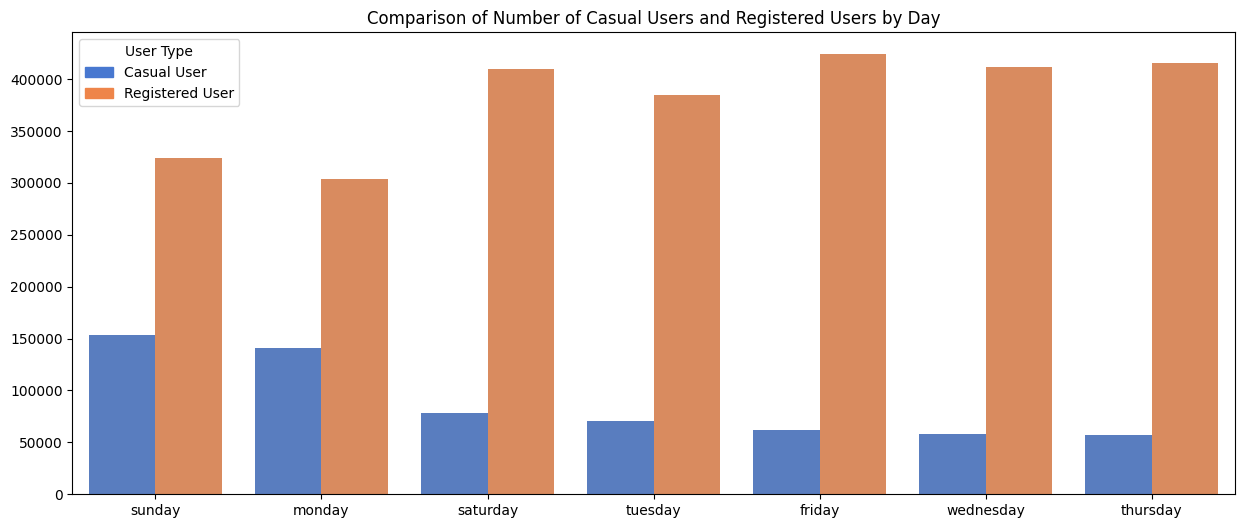

In [38]:
plt.figure(figsize=(15, 6))


sns.barplot(x="day", y="user_count", hue="user_type", data=daily_user_type, palette="muted")
plt.ylabel(None)
plt.xlabel(None)
plt.title("Comparison of Number of Casual Users and Registered Users by Day")
casual_patch = mpatches.Patch(color=sns.color_palette("muted")[0], label='Casual User')
registered_patch = mpatches.Patch(color=sns.color_palette("muted")[1], label='Registered User')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")
plt.show()

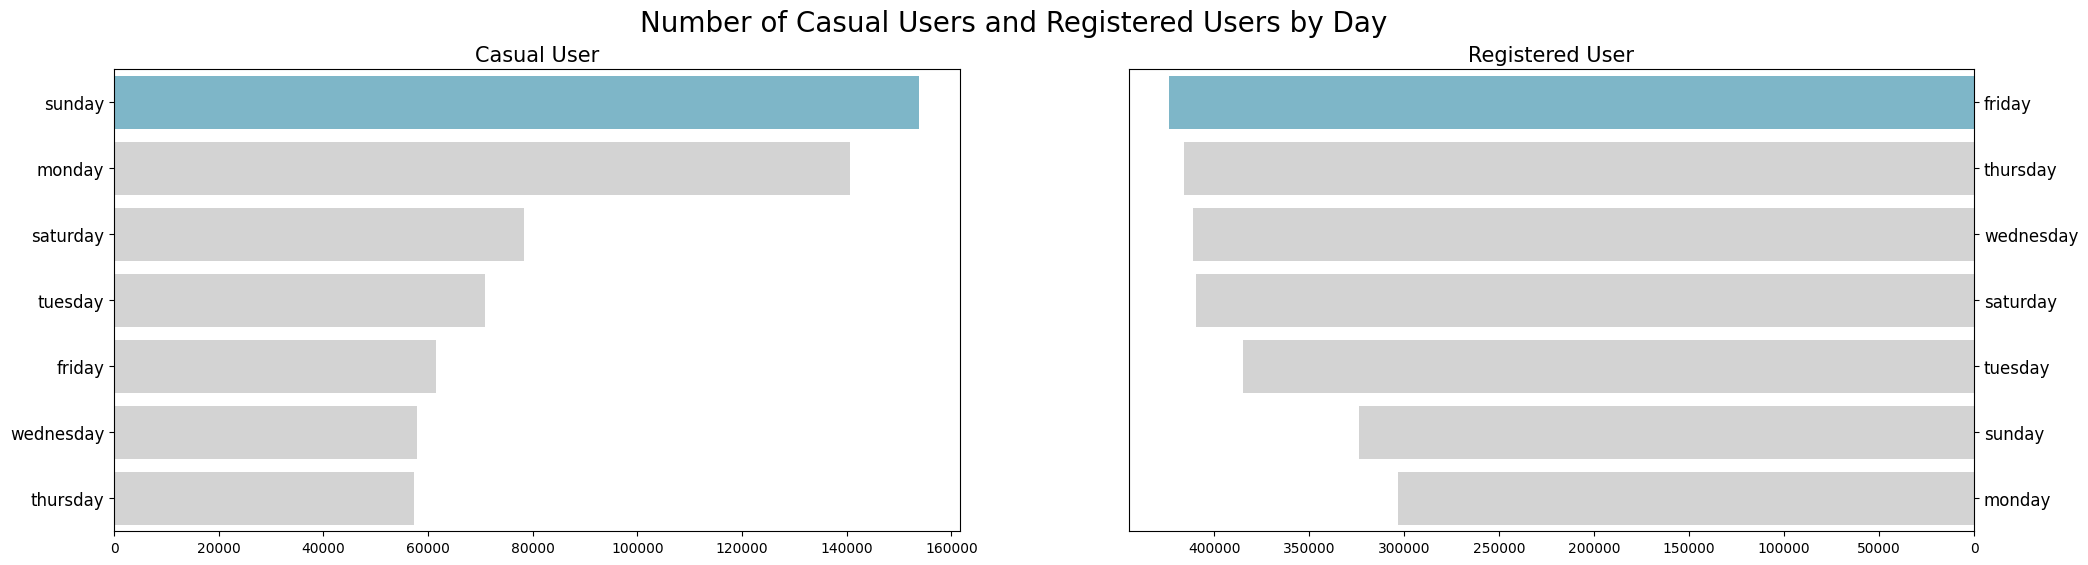

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="casual_user", y="day", data=sum_casual_user, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="registered_user", y="day", data=sum_registered_user, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Number of Casual Users and Registered Users by Day", fontsize=20)
plt.show()

Dari visualisasi di atas dapt dilihat bahwa setiap harinya pengguna Bike Sharing dengan tipe "registered user" memiliki jumlah yang lebih banyak daripada pengguna dengan tipe "casual user".

Jika dilihat berdasarkan masing-masing tipe pengguna, pengguna dengan tipe "casual user" paling banyak terdapat pada hari Minggu dengan total 153.852 pengguna. Sementara untuk pengguna bertipe "registered_user" paling banyak terdapat pada hari Jumat dengan total 423.935 pengguna.

### **Produktifitas Bike Sharing Berdasarkan Waktunya (Pertanyaan 2)**

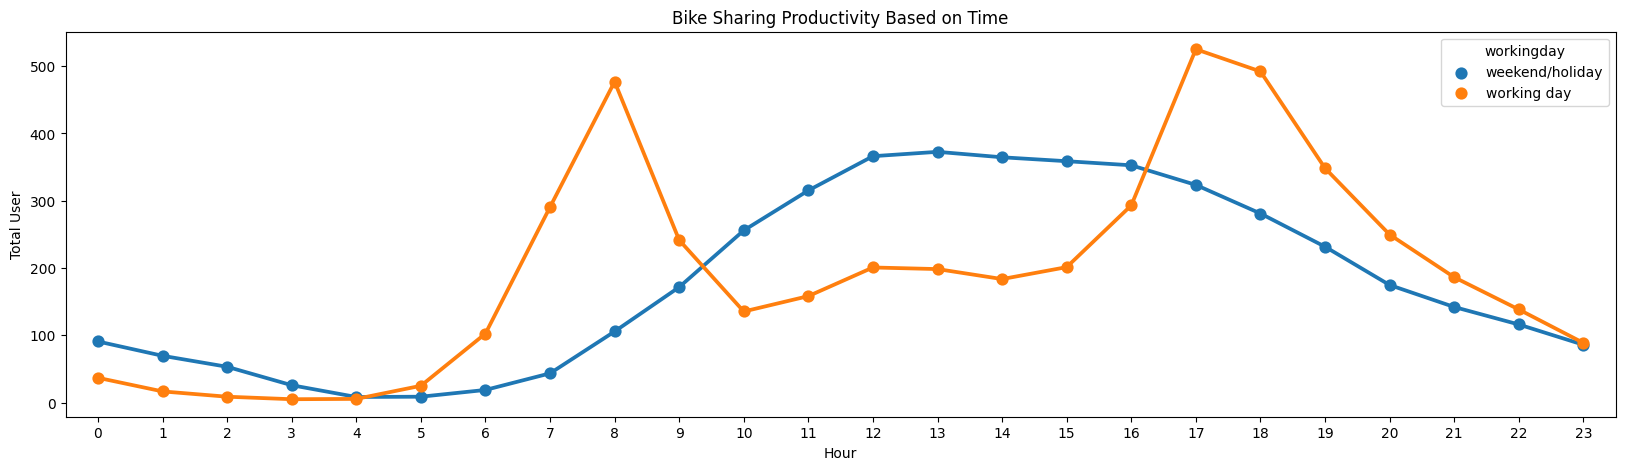

In [40]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour, x='hour', y='total_user', hue='workingday', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity Based on Time')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()

Pada saat weekend atau holiday, jumlah pengguna mulai bertambah pada jam 6.00 pagi dan terus mengalami peningkatan hingga puncaknya jumlah pengguna paling banyak terjadi pada jam 13.00 siang. Sejak jam 16.00 jumlah pengguna mulai mengalami penurunan hingga jam 5.00 pagi.

Sementara pada hari kerja jumlah pengguna mengalami kenaikan yang signifikan pada jam-jam berangkat dan pulang kerja yaitu pada jam 6.00 hingga 8.00 pagi dan jam 15.00 hingga 17.00 sore. Sementara penurunan pengguna yang cukup signifikan terjadi pada jam 9.00 pagi saat orang-orang sudah aktif bekerja di kantor dan pada malam hari mulai jam 19.00. Jumlah pengguna cenderung sedikit mulai tengah malam hingga jam 5 pagi.

### **Produktivitas Bike Sharing Berdasarkan Bulan (Pertanyaan 3)**

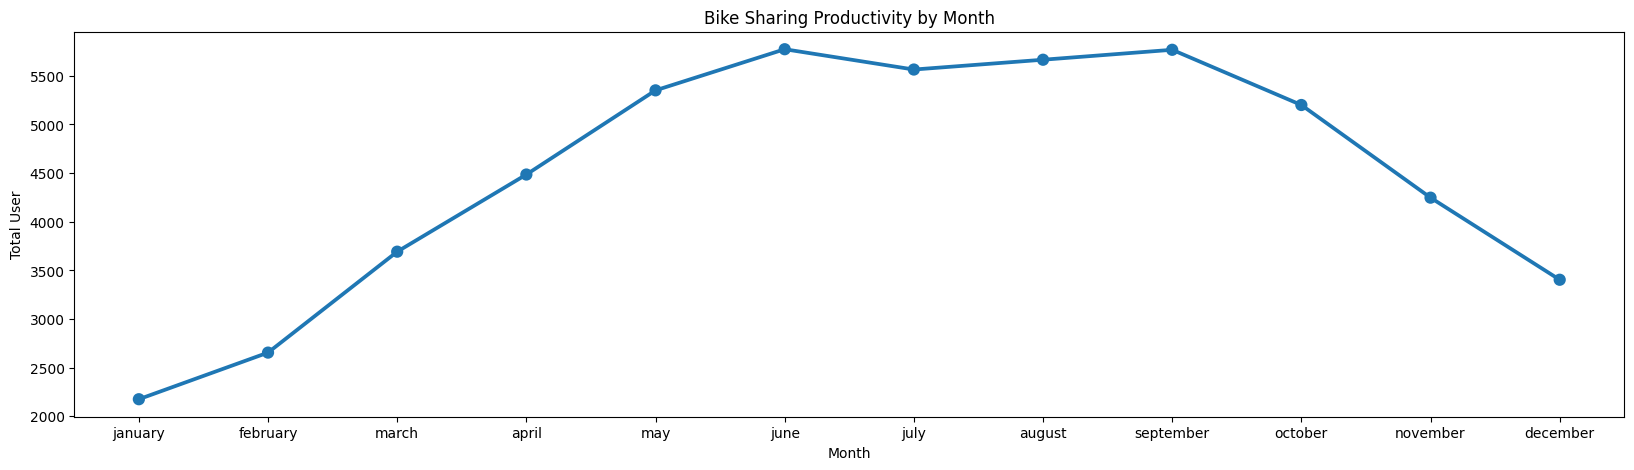

In [41]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=day, x='month', y='total_user', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity by Month')
ax.set_ylabel('Total User')
ax.set_xlabel('Month')
plt.show()

Bike Sharing memiliki produktifitas yang sangat tinggi pada bulan Juni dan September dengan banyaknya pengguna yang menyewa sepeda pada bulan-bulan tersebut. Sementara mulai bulan Oktober jumlah pengguna terus menurun hingga titik paling rendah di bulan Januari. Jumlah pengguna kembali mengalami kenaikan mulai bulan Februari.

### **Pengaruh Cuaca dan Musim Terhadap Produktifitas Bike Sharing (Pertanyaan 4)**

In [42]:
byweather = hour.groupby("weather").total_user.sum().sort_values(ascending=False).reset_index()
byweather

,weather,total_user
0,clear,2338173
1,mist,795952
2,light snow,158331
3,heavy rain,223


In [43]:
byseason = hour.groupby("season").total_user.sum().sort_values(ascending=False).reset_index()
byseason

,season,total_user
0,fall,1061129
1,summer,918589
2,winter,841613
3,springer,471348


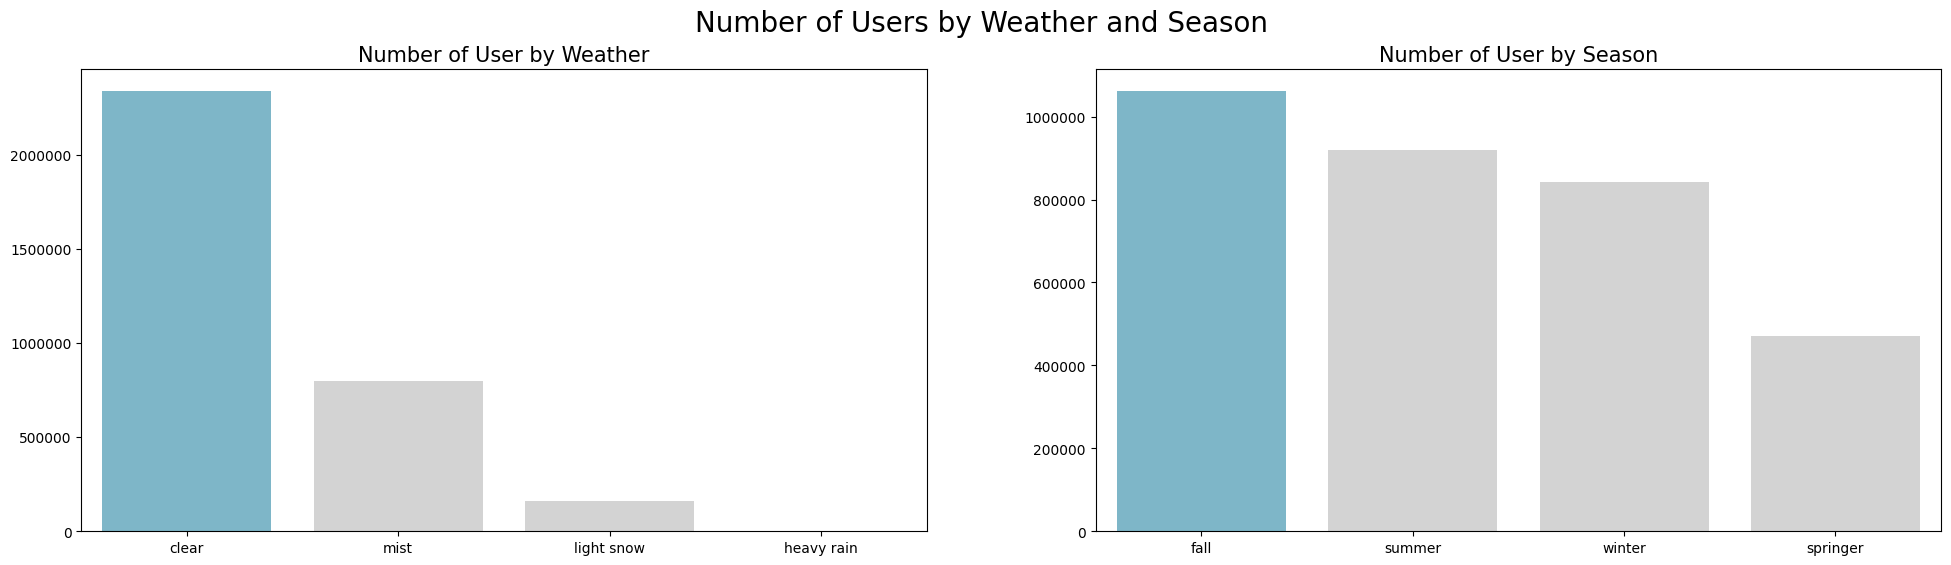

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="total_user", x="weather", data=byweather.sort_values(by="total_user", ascending=False), palette=colors, ax=ax[0])
ax[0].set_title("Number of User by Weather", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(y="total_user", x="season", data=byseason.sort_values(by="total_user", ascending=False), palette=colors, ax=ax[1])
ax[1].set_title("Number of User by Season", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].ticklabel_format(style='plain', axis='y')

plt.suptitle("Number of Users by Weather and Season", fontsize=20)
plt.show()

Berdasarkan kondisi cuaca, Bike Sharing memiliki produktifitas yang sangat tinggi pada saat cuaca cerah ataupun sedikit berawan dengan pengguna berjumlah 2.338.173 pengguna. Sementara pada saat hujan lebat, badai, salju, maupun berkabut produktifitas Bike Sharing sangat rendah dengan pengguna yang hanya berjumlah 223 orang.

Jika dilihat berdasarkan musim, produktifitas tertinggi terjadi pada musim gugur dengan jumlah pengguna sebanyak 1.061.129 orang. Sementara produktifitas terendah terjadi pada musim semi dengan jumlah pengguna sebanyak 471.348 orang.

### **RFM Analysis**

In [45]:
rfm_df = day.groupby(by="day", as_index=False).agg({
    "date": "max", # retrieve the date of the last order
    "instant": "nunique", # calculate the order quantity
    "total_user": "sum" # calculate the amount of revenue generated
})

rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]

# calculates when the customer last made a transaction (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,day,frequency,monetary,recency
0,friday,104,485395,4
1,monday,105,444027,1
2,saturday,104,487790,3
3,sunday,105,477807,2
4,thursday,104,473048,5
5,tuesday,105,455503,0
6,wednesday,104,469109,6


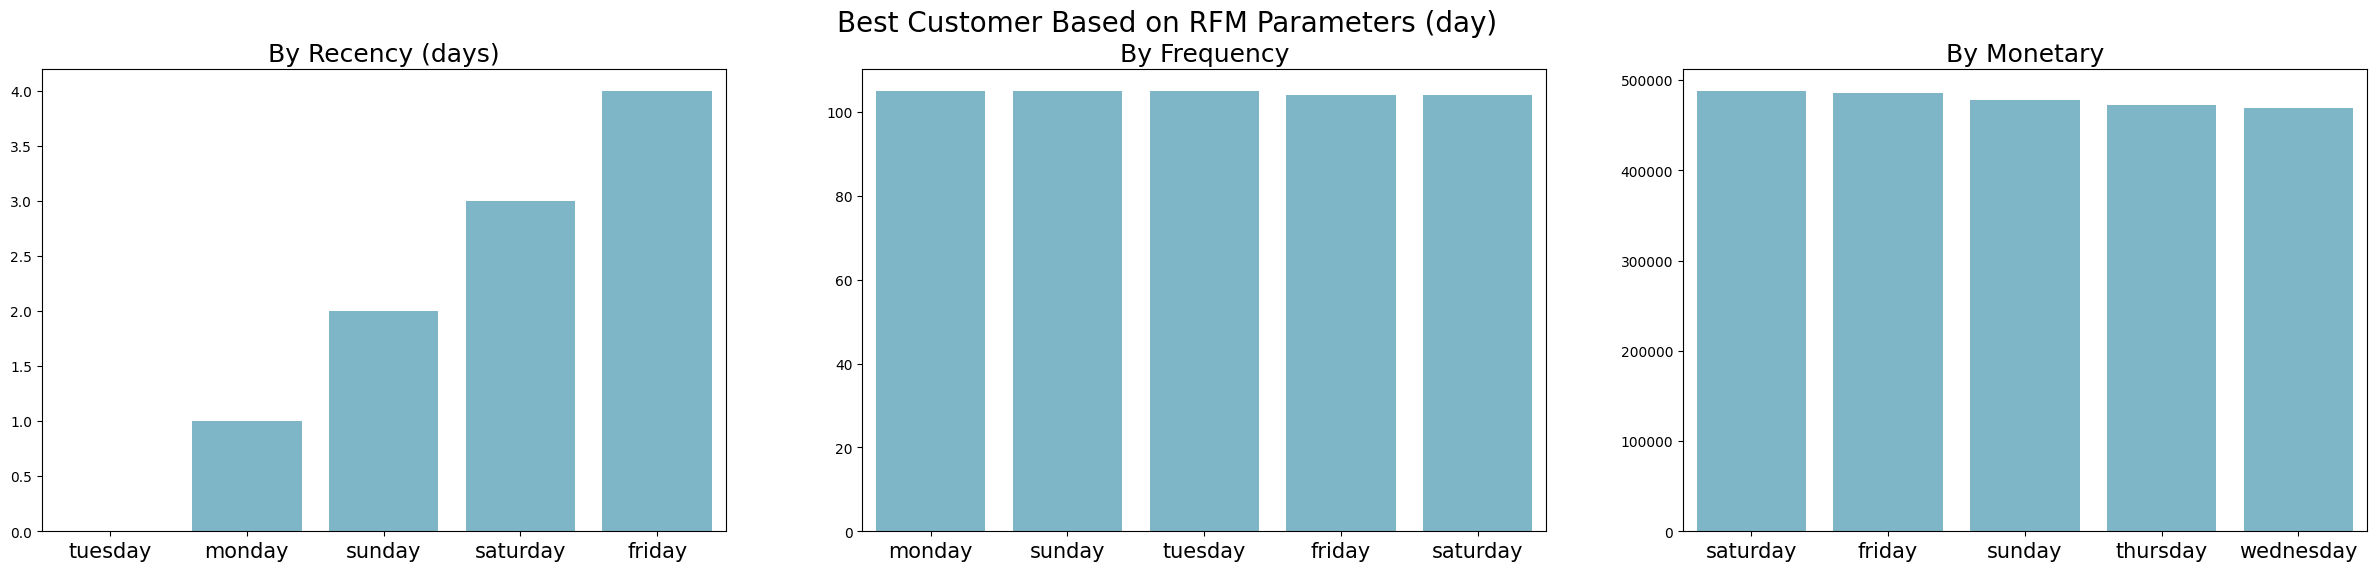

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="day", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="day", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="day", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)
plt.show()

## **Kesimpulan**

* Secara keseluruhan, pengguna dengan tipe registered user berjumlah lebih banyak daripada casual user. Pengguna bertipe registered user paling banyak terdapat pada hari Jumat, sementara casual user paling banyak pada hari Minggu.
* Pada hari kerja pengguna paling banyak terdapat pada saat jam berangkat dan pulang kerja, sementara pada saat holiday/weekend pengguna paling banyak terdapat pada saat siang hingga sore hari sekitar jam 12.00 hingga 16.00.
* Pengguna Bike Sharing relatif sedikit mulai tengah malam hingga jam 5 pagi.
* Bulan September dan Juni adalah bulan dengan user Bike Sharing paling banyak.
* Pengguna Bike Sharing lebih banyak pada cuaca yang cerah dan sangat sedikit pada saat cuaca hujan lebat.
* Pengguna Bike Sharing paling banyak terdapat pada musim gugur.

## **Export Clean Dataset**

In [47]:
day.to_csv("day_clean.csv", index=False)